### Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto20/NumeroVentiladores_T.csv"
data = pd.read_csv(url)

In [3]:
data = data.rename(columns={"Ventiladores": "fecha"}) #Le cambiamos el nombre a la columna
data.tail()

,fecha,total,disponibles,ocupados
47,2020-05-31,2576,313,2263
48,2020-06-01,2604,286,2318
49,2020-06-02,2739,340,2399
50,2020-06-03,2739,330,2409
51,2020-06-04,2739,323,2416


## Gráfico de barras: Cantidad de ventiladores totales vs ocupados

In [36]:
def labelonbars(X, Y, color, rota):
    n    = len(X)
    ante = 0
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        
        if ante != number:
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, -20),
                textcoords="offset points",
                ha ='center', va='bottom',
                color = color, weight='bold',
                size = '10', rotation = rota)
        
        ante = number

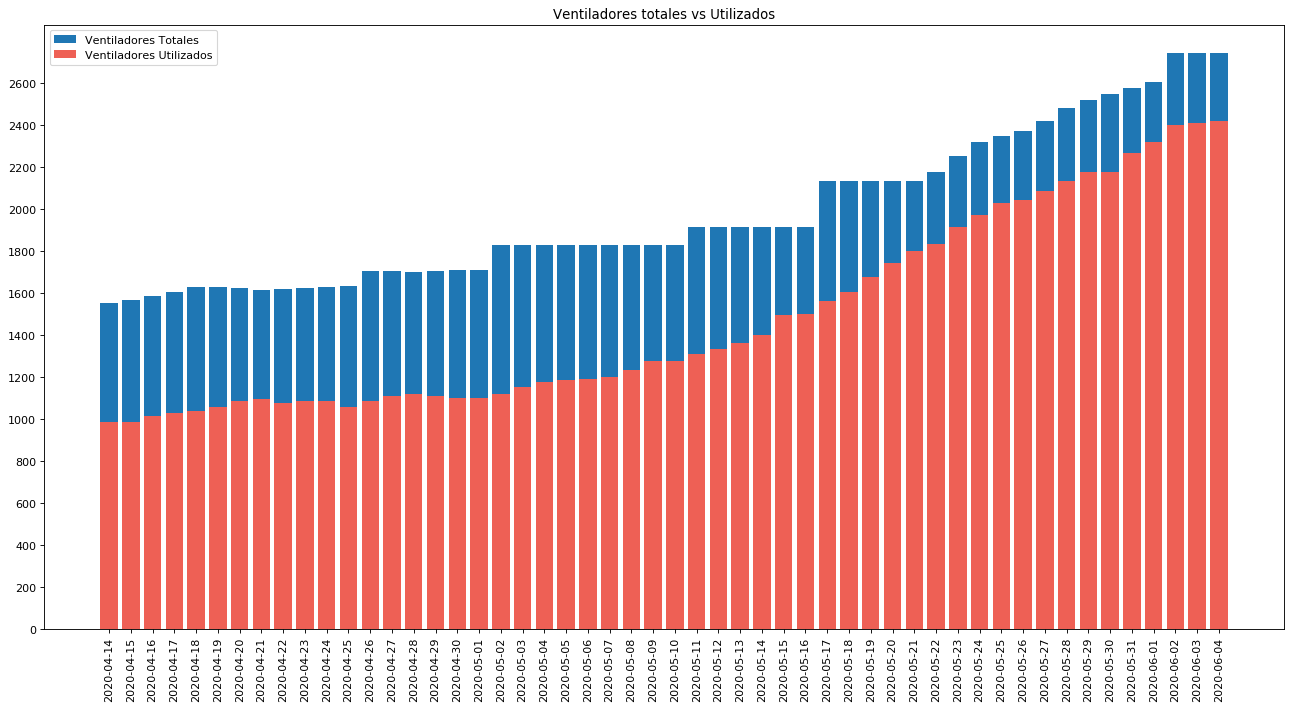

In [5]:
plt.figure(figsize=(20, 10), dpi=80)
plt.bar(data["fecha"],data["total"])                          ##Ventiladores totales
plt.bar(data["fecha"],data["ocupados"], color = '#EE6055')    ##Ventiladores ocupados

today           = [data["fecha"].values.tolist()[len(data)-1]]
lastdisponibles = [data["total"].values.tolist()[len(data)-1]]
lastutilizados  = [data["ocupados"].values.tolist()[len(data)-1]]

#labelonbars(today, lastdisponibles, 'black', '40')
#labelonbars(today, lastutilizados, 'black', '40')

plt.legend(['Ventiladores Totales','Ventiladores Utilizados'], loc = 'upper left')
plt.xticks(data["fecha"], rotation='vertical')
plt.title("Ventiladores totales vs Utilizados")
plt.yticks(np.arange(0, max(data["total"])+1, 200))
plt.show()

## Gráfico de torta: Ventiladores utilizados vs disponibles

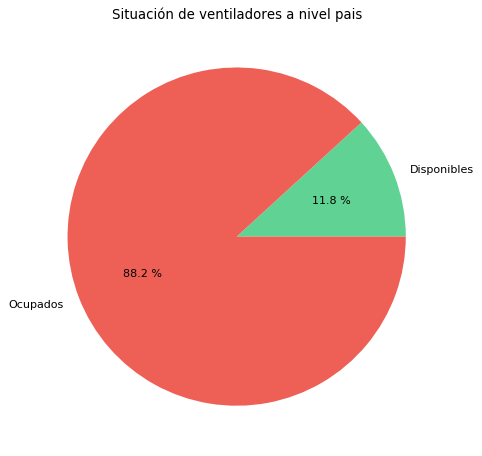

In [6]:
last_day = data.tail(1)
data_pie = last_day[last_day.columns[2::]].values
colores  = ["#60D394", "#EE6055"]

plt.figure(figsize=(10, 7), dpi=80)
plt.pie(data_pie[0], labels = ["Disponibles", "Ocupados"], autopct="%0.1f %%", colors=colores)
plt.title("Situación de ventiladores a nivel pais")
plt.show()

## Gráfico de lineas: Ventiladores totales, disponibles y utilizados.

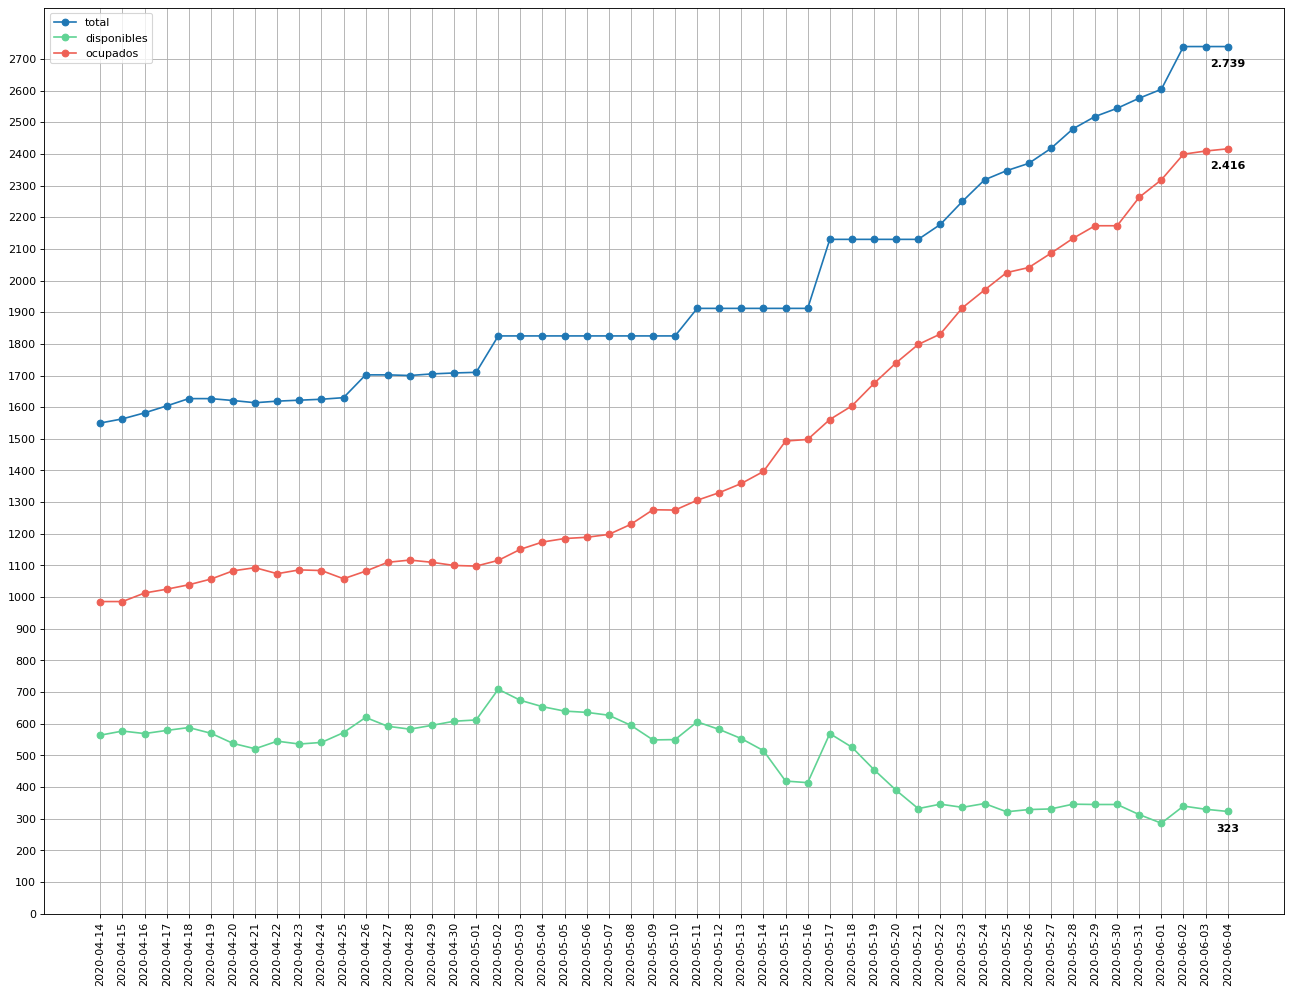

In [37]:
plt.figure(figsize=(20, 15), dpi=80)
plt.plot(data["fecha"], data["total"],       "o-")
plt.plot(data["fecha"], data["disponibles"], "o-", color = '#60D394')
plt.plot(data["fecha"], data["ocupados"],    "o-", color = '#EE6055')

labelonbars([data["fecha"][len(data)-1]], [data["total"][len(data)-1]], 'black', '0')
labelonbars([data["fecha"][len(data)-1]], [data["disponibles"][len(data)-1]], 'black', '0')
labelonbars([data["fecha"][len(data)-1]], [data["ocupados"][len(data)-1]], 'black', '0')

plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, max(data["total"]), 100))
plt.legend(data.columns[1::])
plt.grid()
plt.show()